# Importing libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Importing the dataset

In [3]:
df=pd.read_csv('C://Users//Faith//Desktop//Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# To rename the features
df.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Spending_score'}, inplace=True)

In [8]:
df.head()

,CustomerID,Gender,Age,Income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory analysis

In [9]:
df.describe()

,CustomerID,Age,Income,Spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.shape

(200, 5)

In [13]:
df.dtypes

CustomerID         int64
Gender            object
Age                int64
Income             int64
Spending_score     int64
dtype: object

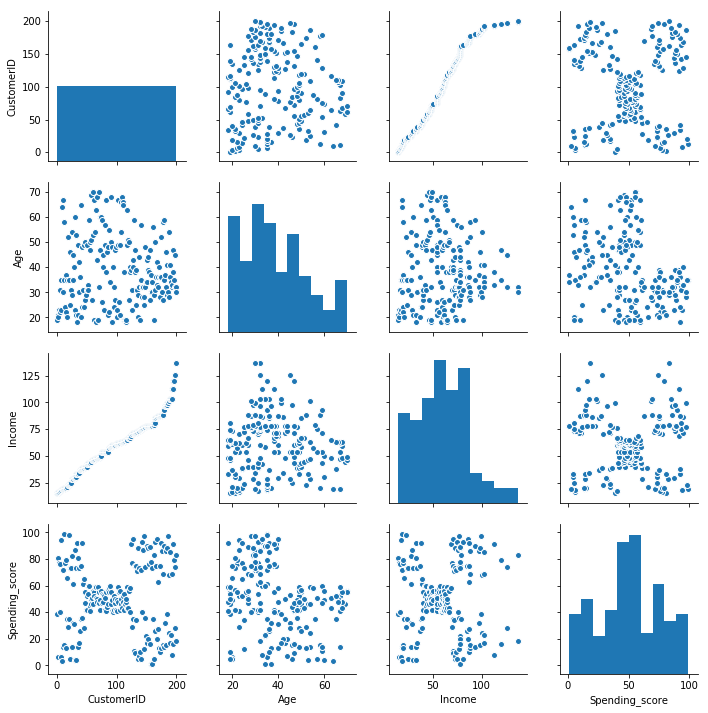

In [14]:
sns.pairplot(df)

# K-Means clustering analysis for Age and Spending_score

In [19]:
from sklearn.cluster import KMeans


In [22]:
kmeans=KMeans(n_clusters=5, init='k-means++')

In [28]:
kmeans=kmeans.fit(df[['Age','Spending_score']])

In [31]:
kmeans.cluster_centers_

array([[30.1754386 , 82.35087719],
       [43.28205128, 11.84615385],
       [25.775     , 50.775     ],
       [44.70588235, 38.76470588],
       [60.36666667, 51.16666667]])

Attaching clusters to the original dataframe

In [33]:
df['cluster']=kmeans.labels_

In [34]:
df.head()

,CustomerID,Gender,Age,Income,Spending_score,cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


In [35]:
df.cluster.value_counts()

0    57
2    40
1    39
3    34
4    30
Name: cluster, dtype: int64

In [37]:
df.to_csv('df.csv', index=False)

Plot cluster on chart

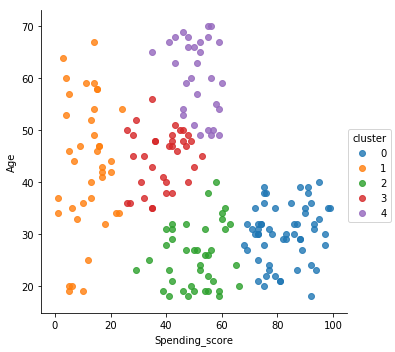

In [50]:
sns.lmplot(x='Spending_score', y='Age', hue='cluster', data=df, fit_reg=False)
plt.show()

#  K-Means clustering analysis for Income and Spending_score

In [51]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)

In [52]:
kmeans.fit(df[['Spending_score', 'Income']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
kmeans.cluster_centers_

array([[79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [20.91304348, 26.30434783]])

In [56]:
df['clustincome']= kmeans.labels_

In [58]:
df.head()

,CustomerID,Gender,Age,Income,Spending_score,cluster,clustincome
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,2,4


# plotting the graph

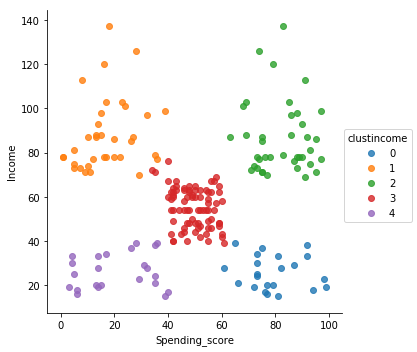

In [60]:
sns.lmplot(x='Spending_score', y='Income', hue='clustincome', data=df, fit_reg=False)